In [1]:
!pip install tweepy


In [2]:
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time
import pandas as pd

In [ ]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the

In [4]:
path = '/content/gdrive/My Drive/SPSN/'

In [6]:
import sys
sys.path.append('/content/gdrive/My Drive/SPSN/')

In [7]:
from secret_ass2 import *

In [8]:
# Connect to Twitter API using the secrets
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [9]:
queryword = "amitabh bachchan"
users = api.search_users(queryword)
screenname_array1=[user.screen_name for user in users]
print(screenname_array1)
tl = pd.DataFrame(screenname_array1)




userid_array2=[user.id for user in users]
print(userid_array2)
tl1=pd.DataFrame(userid_array2)



createdat_array3=[user.created_at for user in users]
print(createdat_array3)
tl2=pd.DataFrame(createdat_array3)


userlocation_array4=[user.location for user in users]
print(userlocation_array4)
tl3=pd.DataFrame(userlocation_array4)


userdescription_array5=[user.description for user in users]
print(userdescription_array5)
tl4=pd.DataFrame(userdescription_array5)


username_array6=[user.name for user in users]
print(username_array6)
tl5=pd.DataFrame(username_array6)

userfollowerscount_array7=[user.followers_count for user in users]
print(userfollowerscount_array7)
tl6=pd.DataFrame(userfollowerscount_array7)


['SrBachchan', 'EFSENAROCKS', 'prashantkawadia', 'ABFAIndia', 'SrBachchanclub', 'OneManIndustry', 'MosesSapir', 'AmitKBhatt2', 'AbhiAsh_IndoFc', 'addzz8', 'yadavsunanda08', 'MaliAshishABEF', 'MilanMehta_AB', 'iam_Jitu', 'shubhijha', 'IAMSANTONU', 'ilanasegev37', 'RoHiTBhUtoRIa', 'OxanaChernavski', 'MOUSUMI_EF']
[145125358, 165448626, 363188892, 960860944875188226, 920305972635037696, 1978386403, 96613617, 988491670282014721, 1113976070, 145934849, 2754315743, 607860151, 959398171922313217, 353607637, 145226295, 1418157938, 265928625, 74353995, 1023093346326257664, 1407612847]
[datetime.datetime(2010, 5, 18, 5, 16, 47), datetime.datetime(2010, 7, 11, 16, 9, 15), datetime.datetime(2011, 8, 27, 17, 38, 16), datetime.datetime(2018, 2, 6, 13, 1, 15), datetime.datetime(2017, 10, 17, 15, 10, 17), datetime.datetime(2013, 10, 21, 11, 10, 25), datetime.datetime(2009, 12, 13, 19, 54, 50), datetime.datetime(2018, 4, 23, 18, 55, 54), datetime.datetime(2013, 1, 23, 9, 49, 27), datetime.datetime(2010

In [10]:
import numpy as np
combined_array = np.array([screenname_array1,userid_array2,createdat_array3,userlocation_array4,userdescription_array5,username_array6,userfollowerscount_array7]).T
print(combined_array) #will use as X later
df2 = pd.DataFrame(np.array([screenname_array1,userid_array2,createdat_array3,userlocation_array4,userdescription_array5,username_array6,userfollowerscount_array7])).T
df2.columns = ['ScreenName', 'Id', 'CreatedDate', 'Location','Description','Name','FollowersCount']

print(df2)
#X = combined_array
#y = [2,2,2,1,1,0,1,0,0,0,0,0,0,2,1,0,0,1,0,2]

df2.to_csv(r'/content/gdrive/My Drive/SPSN/DFamitbachan_usl.csv',index=None, sep='\t', mode='a')

[['SrBachchan' 145125358 datetime.datetime(2010, 5, 18, 5, 16, 47)
  'Mumbai, India'
  '"तुमने हमें पूज पूज कर पत्थर कर डाला ; वे जो हमपर जुमले कसते हैं हमें ज़िंदा तो समझते हैं "~  हरिवंश राय  बच्चन'
  'Amitabh Bachchan' 44659119]
 ['EFSENAROCKS' 165448626 datetime.datetime(2010, 7, 11, 16, 9, 15)
  'India ' 'The Extended Family Of Mr. Amitabh Bachchan'
  'Amitabh Bachchan EF' 10472]
 ['prashantkawadia' 363188892 datetime.datetime(2011, 8, 27, 17, 38, 16)
  'Mumbai, India'
  'मैं छुपाना जानता तो जग मुझे साधु समझता, शत्रु मेरा बन गया है छल-रहित व्यवहार मेरा.. ~ बाबूजी श्री हरिवंशराय बच्चन जी 💖'
  'THUGS OF 𝐀𝐦𝐢𝐭𝐚𝐛𝐡 𝐁𝐚𝐜𝐡𝐜𝐡𝐚𝐧 🇮🇳' 11364]
 ['ABFAIndia' 960860944875188226 datetime.datetime(2018, 2, 6, 13, 1, 15)
  'Mumbai, India'
  'In devotion of our infinite love, gratitude & appreciation to our beloved 😍  Daa 😍 Jai Shri Amitabh 🙏 #ABFA'
  "Amitabh Bachchan Fans' Association - Official" 6550]
 ['SrBachchanclub' 920305972635037696
  datetime.datetime(2017, 10, 17, 15, 10, 17) 'Worldwide'
  

In [31]:
#string data to int block
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder


#df2.drop(['CreatedDate', 'Description'], axis=1)

X = df2[['ScreenName', 'Id','Location','Name','FollowersCount']].values

color_le = LabelEncoder()
#converting all string data to numbers

X[:, 0] = color_le.fit_transform(X[:, 0])
X[:,2]=color_le.fit_transform(X[:, 2])
X[:,3]=color_le.fit_transform(X[:, 3])
print(X) #converted the screen names to integer for easy calculation

data=pd.DataFrame(X) #converting X array to dataframe data
print(data)

[[12 145125358 11 2 44659119]
 [3 165448626 1 3 10472]
 [17 363188892 11 17 11364]
 [0 960860944875188226 11 6 6550]
 [13 920305972635037696 15 4 8933]
 [9 1978386403 10 5 9095]
 [8 96613617 4 11 31013]
 [2 988491670282014721 14 1 1374]
 [1 1113976070 3 0 32039]
 [14 145934849 2 18 10491]
 [19 2754315743 9 16 9727]
 [6 607860151 7 7 2269]
 [7 959398171922313217 13 10 1012]
 [15 353607637 6 9 11621]
 [18 145226295 16 19 176]
 [4 1418157938 8 15 3813]
 [16 265928625 0 8 9441]
 [11 74353995 5 14 2408]
 [10 1023093346326257664 12 13 464]
 [5 1407612847 5 12 5612]]
     0                    1   2   3         4
0   12            145125358  11   2  44659119
1    3            165448626   1   3     10472
2   17            363188892  11  17     11364
3    0   960860944875188226  11   6      6550
4   13   920305972635037696  15   4      8933
5    9           1978386403  10   5      9095
6    8             96613617   4  11     31013
7    2   988491670282014721  14   1      1374
8    1           11

In [32]:
#kmeans - simples unsupervised clustering algo - yaad rakhne k lie - birds of same feather flock together
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

print(data.head()) 
print(data.describe())

    0                   1   2   3         4
0  12           145125358  11   2  44659119
1   3           165448626   1   3     10472
2  17           363188892  11  17     11364
3   0  960860944875188226  11   6      6550
4  13  920305972635037696  15   4      8933
         0           1   2   3     4
count   20          20  20  20    20
unique  20          20  17  20    20
top     19  2754315743  11  19  9727
freq     1           1   3   1     1


In [33]:
#Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. 
#So let’s first bring all the variables to the same magnitude:

# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-2.220446e-17,-1.110223e-17,-7.771561e-17,-4.163336e-17,5.828671e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.647509e+00,-5.768747e-01,-1.748448e+00,-1.647509e+00,-2.303055e-01
25%,-8.237545e-01,-5.768747e-01,-7.294139e-01,-8.237545e-01,-2.300797e-01
50%,0.000000e+00,-5.768747e-01,7.508673e-02,0.000000e+00,-2.293973e-01
75%,8.237545e-01,-2.979637e-02,6.650539e-01,8.237545e-01,-2.292231e-01
max,1.647509e+00,1.855847e+00,1.684088e+00,1.647509e+00,4.358897e+00


In [34]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++') #kmeans++ is used to initialize the cluster centre used in kmeans

# fitting the k means algorithm on scaled data
y_kmeans = kmeans.fit(data_scaled)
print(y_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [35]:
# inertia on the fitted data means-> how well the formed cluster are
kmeans.inertia_

46.10021899741382

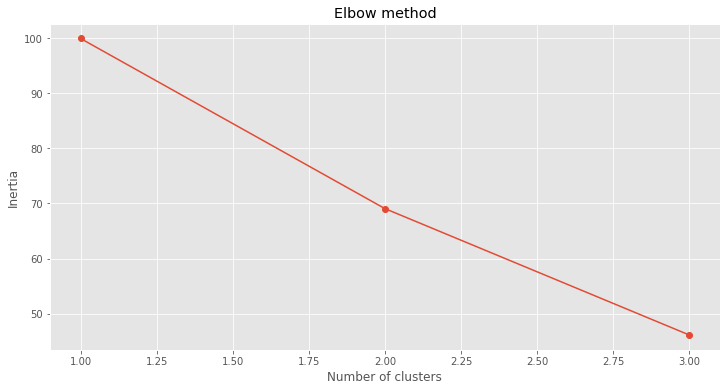

In [16]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,4):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,4), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()



In [36]:
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
dg=frame['cluster'].value_counts()
dg

0    14
1     5
2     1
Name: cluster, dtype: int64

Automatically created module for IPython interactive environment
Elapsed time: 0.02s
Number of points: 20


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


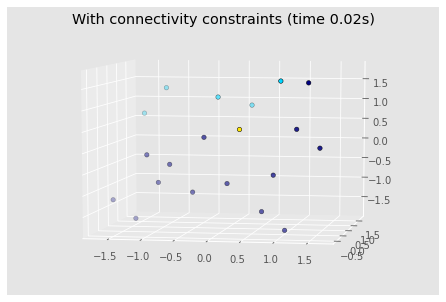

In [18]:
#Hirarchical clustering->usage of distance matrix , and every point is cluster in the first step.
#2 closest point will be clubbed together according to the distance matrix
print(__doc__)

import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


connectivity = kneighbors_graph(data_scaled, n_neighbors=3, include_self=False) #restricted to knn , structure is priority
st = time.time()
ward = AgglomerativeClustering(n_clusters=3, connectivity=connectivity,
                               linkage='ward').fit(data_scaled)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)


# Plot result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(data_scaled[label == l, 0], data_scaled[label == l, 1], data_scaled[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time)

plt.show()

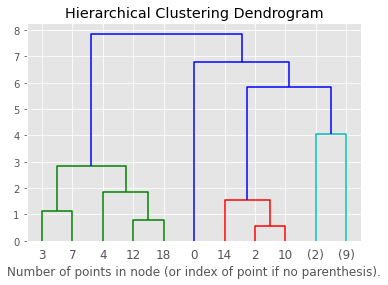

In [19]:
#hierarchical clustering and representation in cluster dendogram
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = data_scaled

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Supervised Learning Algorithms (logistic regression & MLP Classifier)

---



In [46]:
#PCA and Logistic regression , then representation of testing , training data
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import classification_report
X=data_scaled #our data to X
print('X ISSSS',X)
y = [2,2,2,1,1,0,1,0,0,0,0,0,0,2,1,0,0,1,0,2] #output column
#split the data 0.8->train , 0.2->test
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
#random_state = 0 , Controls the shuffling applied to the data before applying the split.

#some preprocessing of data to fit everything in same magnitude
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 
# Apply PCA function on training ,testing of X

from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
#pca 1->explains the most variance
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

print('explained_variance is',explained_variance)

# Fitting Logistic Regression To the training set #basically a supervised learning algo for classification
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = classifier.predict(X_test) 
print('y_pred is',y_pred)

#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

X ISSSS [[ 0.43355498 -0.57687468  0.61142048 -1.30066495  4.35889729]
 [-1.12724296 -0.57687468 -1.53391453 -1.12724296 -0.22924748]
 [ 1.30066495 -0.57687468  0.61142048  1.30066495 -0.22915581]
 [-1.64750894  1.70787058  0.61142048 -0.60697698 -0.2296505 ]
 [ 0.60697698  1.61143854  1.46955448 -0.95382097 -0.22940562]
 [-0.086711   -0.57687467  0.39688698 -0.78039897 -0.22938898]
 [-0.26013299 -0.57687468 -0.89031403  0.26013299 -0.22713666]
 [-1.30066495  1.77357121  1.25502098 -1.47408695 -0.2301824 ]
 [-1.47408695 -0.57687468 -1.10484753 -1.64750894 -0.22703123]
 [ 0.78039897 -0.57687468 -1.31938103  1.47408695 -0.22924552]
 [ 1.64750894 -0.57687467  0.18235348  1.12724296 -0.22932403]
 [-0.60697698 -0.57687468 -0.24671353 -0.43355498 -0.23009042]
 [-0.43355498  1.70439239  1.04048748  0.086711   -0.2302196 ]
 [ 0.95382097 -0.57687468 -0.46124703 -0.086711   -0.2291294 ]
 [ 1.47408695 -0.57687468  1.68408799  1.64750894 -0.2303055 ]
 [-0.95382097 -0.57687468 -0.03218003  0.953820

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


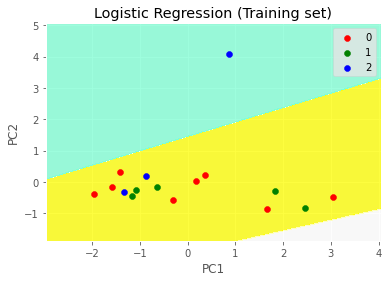

In [47]:

# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


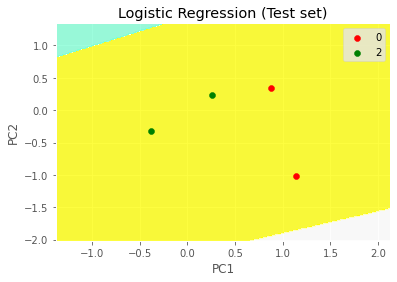

In [22]:
 
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_test, y_test #same code as above , just the supplied data is changed
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))  
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
# title for scatter plot 
plt.title('Logistic Regression (Test set)')  
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 
  
# show scatter plot 
plt.show()

In [48]:
#MLP Classifier- supervised algo
#lib import
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#train test
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
#model train
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print('clf is',clf)
#accuracy score of model
clf.score(X_test, y_test) #Return the mean accuracy on the given test data and labels


clf is MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


0.88